# LogisticRegression 알고리즘을 사용하여 남성인지 여성인지 분류합니다

## 데이터준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
total_df = pd.read_csv('/content/weight-height.csv')
sex_full = total_df.to_numpy()
total_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# 모델 학습하기

In [3]:
maleHeight = total_df['Height']
maleHeight = maleHeight[:5000]

maleHeight.head()


0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [4]:
femaleHeight = total_df['Height']
femaleHeight = femaleHeight[5000:10000]
femaleHeight.head()

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
Name: Height, dtype: float64

In [5]:
maleWeight = total_df['Weight']
maleWeight = maleWeight[:5000]
maleWeight.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [6]:
femaleWeight = total_df['Weight']
femaleWeight = femaleWeight[5000:10000]
femaleWeight.head()

5000    102.088326
5001    141.305823
5002    131.041403
5003    128.171511
5004    129.781407
Name: Weight, dtype: float64

In [7]:
maleWeightlist = []
maleHeightlist = []
femaleWeightlist = []
femaleHeightlist = []
for maleWeightlistindex in maleWeight:
    maleWeightlist.append(maleWeightlistindex)
for maleHeightlistindex in maleHeight:
    maleHeightlist.append(maleHeightlistindex)
for femaleHeightlistindex in femaleHeight:
    femaleHeightlist.append(femaleHeightlistindex)
for femaleWeightlistindex in femaleWeight:
    femaleWeightlist.append(femaleWeightlistindex)

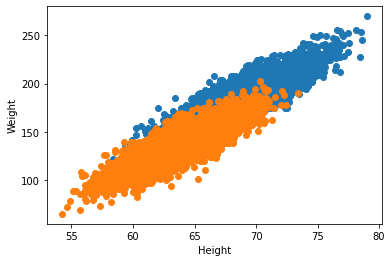

In [8]:
plt.scatter(maleHeightlist, maleWeightlist)
plt.scatter(femaleHeightlist, femaleWeightlist)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()



## 분류하기

In [9]:
persion_input = total_df[["Height", "Weight"]].to_numpy()
print(persion_input[:5])

[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 [ 71.7309784  220.0424703 ]
 [ 69.88179586 206.34980062]]


In [10]:
persion_target = total_df['Gender'].to_numpy()

In [11]:
train_input, test_input, train_target, test_target = train_test_split(persion_input, persion_target, random_state = 200)

In [12]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
lr = LogisticRegression()
lr.fit(train_input, train_target)
print(lr.predict(train_input[:5]))

['Male' 'Female' 'Female' 'Male' 'Female']


In [14]:
print(lr.predict_proba(train_input[:5]))

[[2.08911174e-04 9.99791089e-01]
 [9.01462937e-01 9.85370626e-02]
 [8.27194481e-01 1.72805519e-01]
 [2.05784450e-01 7.94215550e-01]
 [9.98913579e-01 1.08642094e-03]]


In [15]:
print(lr.coef_, lr.intercept_)

[[-0.52243303  0.20355045]] [1.83746572]


In [16]:
print(lr.score(test_input, test_target))

0.9204


# 모델 저장하기

In [17]:
import joblib

In [18]:
joblib.dump(lr, "my_model.pkl")

['my_model.pkl']

In [19]:
my_model_loaded = joblib.load("/content/my_model.pkl")